In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

import seaborn as sns 

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

from collections import Counter

import warnings # don't show warnings
warnings.filterwarnings("ignore")

In [ ]:
world_happiness_report_2015 = pd.read_csv("2015.csv")
world_happiness_report_2016 = pd.read_csv("2016.csv")
world_happiness_report_2017 = pd.read_csv("2017.csv")
world_happiness_report_2018 = pd.read_csv("2018.csv")
world_happiness_report_2019 = pd.read_csv("2019.csv")
world_happiness_report_2020 = pd.read_csv("2020.csv")
world_happiness_report_2021 = pd.read_csv("2021.csv")
world_happiness_report_2022 = pd.read_csv("2022.csv")

In [ ]:
# Renaming columns

In [ ]:
world_happiness_report_2015.rename(columns={"Happiness Rank": "Overall rank", "Economy (GDP per Capita)": "GDP per capita", "Health (Life Expectancy)": "Life expectancy"}, inplace=True)

In [ ]:
world_happiness_report_2016.rename(columns={"Happiness Rank": "Overall rank", "Economy (GDP per Capita)": "GDP per capita", "Health (Life Expectancy)": "Life expectancy"}, inplace=True)

In [ ]:
world_happiness_report_2016.columns

Index(['Country', 'Region', 'Overall rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'GDP per capita', 'Family', 'Life expectancy', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
world_happiness_report_2017.rename(columns={"Happiness.Rank": "Overall rank", "Happiness.Score":"Happiness Score","Whisker.high":"Upper Confidence Interval",
                                            "Whisker.low":"Lower Confidence Interval","Economy..GDP.per.Capita.": "GDP per capita", "Health..Life.Expectancy.": "Life expectancy",
                                            "Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual":"Dystopia Residual"}, inplace=True)

In [ ]:
world_happiness_report_2018.rename(columns={"Country or region": "Country", "Score":"Happiness Score","Social support": "Family", "Health life expectancy.": "Life expectancy",
                                            "Perceptions of corruption":"Trust (Government Corruption)", "Freedom to make life choices":"Freedom"}, inplace=True)

In [ ]:
world_happiness_report_2018.rename(columns={"Healthy life expectancy": "Life expectancy"}, inplace=True)

In [ ]:
world_happiness_report_2019.rename(columns={"Healthy life expectancy": "Life expectancy"}, inplace=True)

In [ ]:
world_happiness_report_2019.rename(columns={"Country or region": "Country", "Score":"Happiness Score","Social support": "Family", "Health life expectancy.": "Life expectancy",
                                            "Perceptions of corruption":"Trust (Government Corruption)", "Freedom to make life choices":"Freedom"}, inplace=True)

In [ ]:
world_happiness_report_2020.drop(['Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1, inplace=True)


In [ ]:
world_happiness_report_2020.rename(columns={"Country name": "Country", "Regional indicator":"Region", "Ladder score":"Happiness Score", "upperwhisker":"Upper Confidence Interval",
                                            "lowerwhisker":"Lower Confidence Interval", "Logged GDP per capita": "GDP per capita","Social support": "Family", 
                                            "Healthy life expectancy": "Life expectancy","Perceptions of corruption":"Trust (Government Corruption)",
                                            "Freedom to make life choices":"Freedom", "Dystopia + residual":"Dystopia Residual"}, inplace=True)

In [ ]:
world_happiness_report_2021.drop(['Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1, inplace=True)



In [ ]:
world_happiness_report_2021.rename(columns={"Country name": "Country", "Regional indicator":"Region", "Ladder score":"Happiness Score", "upperwhisker":"Upper Confidence Interval",
                                            "lowerwhisker":"Lower Confidence Interval", "Logged GDP per capita": "GDP per capita","Social support": "Family", 
                                            "Healthy life expectancy": "Life expectancy","Perceptions of corruption":"Trust (Government Corruption)",
                                            "Freedom to make life choices":"Freedom", "Dystopia + residual":"Dystopia Residual"}, inplace=True)

In [ ]:
world_happiness_report_2022.rename(columns={"Country name": "Country", "Ladder score":"Happiness Score", "Whisker-high":"Upper Confidence Interval",
                                            "Whisker-low":"Lower Confidence Interval", "Explained by: GDP per capita": "GDP per capita","Explained by: Social support": "Family", 
                                            "Explained by: Healthy life expectancy": "Life expectancy","Explained by: Perceptions of corruption":"Trust (Government Corruption)",
                                            "Explained by: Freedom to make life choices":"Freedom", "Explained by: Generosity":"Generosity"}, inplace=True)

In [ ]:
#world_happiness_report_2022.rename(columns={"Country": "Country name"}, inplace=True)
#world_happiness_report_2022.rename(columns={"Happiness score": "Ladder score"}, inplace=True)
world_happiness_report_2022.rename(columns={"RANK": "Overall rank"}, inplace=True)

In [ ]:
world_happiness_report_2020["Overall rank"] = (world_happiness_report_2020.index + 1)

In [ ]:
world_happiness_report_2021["Overall rank"] = (world_happiness_report_2021.index + 1)

In [ ]:
world_happiness_report_2022 = world_happiness_report_2022.dropna()

In [ ]:
world_happiness_report_2022.rename(columns={"Happiness score": "Happiness Score"}, inplace=True)

In [ ]:
world_happiness_report_2022.dtypes

Overall rank                      int64
Country                          object
Happiness Score                  object
Upper Confidence Interval        object
Lower Confidence Interval        object
Dystopia (1.83) + residual       object
GDP per capita                   object
Family                           object
Life expectancy                  object
Freedom                          object
Generosity                       object
Trust (Government Corruption)    object
dtype: object

In [ ]:
world_happiness_report_2022.columns

Index(['Overall rank', 'Country', 'Happiness Score',
       'Upper Confidence Interval', 'Lower Confidence Interval',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Family',
       'Life expectancy', 'Freedom', 'Generosity',
       'Trust (Government Corruption)'],
      dtype='object')

In [ ]:
#world_happiness_report_2022.rename(columns={"Ladder score":"Happiness score","Country name": "Country"}, inplace=True)

In [ ]:
world_happiness_report_2022[['Happiness Score',
       'Upper Confidence Interval', 'Lower Confidence Interval',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Family',
       'Life expectancy', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']] = world_happiness_report_2022[['Happiness Score',
       'Upper Confidence Interval', 'Lower Confidence Interval',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Family',
       'Life expectancy', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']].apply(lambda x: x.str.replace(',','.'))


In [ ]:
world_happiness_report_2022[['Happiness Score',
       'Upper Confidence Interval', 'Lower Confidence Interval',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Family',
       'Life expectancy', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']] = world_happiness_report_2022[['Happiness Score',
       'Upper Confidence Interval', 'Lower Confidence Interval',
       'Dystopia (1.83) + residual', 'GDP per capita', 'Family',
       'Life expectancy', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']].astype(float)

In [ ]:
world_happiness_report_2022.dtypes

Overall rank                       int64
Country                           object
Happiness Score                  float64
Upper Confidence Interval        float64
Lower Confidence Interval        float64
Dystopia (1.83) + residual       float64
GDP per capita                   float64
Family                           float64
Life expectancy                  float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
dtype: object

In [ ]:
firstgdp = world_happiness_report_2015['GDP per capita'].max()
secondgdp = world_happiness_report_2016['GDP per capita'].max()
thirdgdp = world_happiness_report_2017['GDP per capita'].max()
fourthgdp = world_happiness_report_2018['GDP per capita'].max()
fifthgdp = world_happiness_report_2019['GDP per capita'].max()
sixthgdp = world_happiness_report_2019['GDP per capita'].max()

np.mean([firstgdp, secondgdp, thirdgdp, fourthgdp, fifthgdp, sixthgdp])

1.808242614339193

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# apply normalization techniques to every years GDP column

world_happiness_report_2015['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2015['GDP per capita']).reshape(-1,1))
world_happiness_report_2016['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2016['GDP per capita']).reshape(-1,1))
world_happiness_report_2017['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2017['GDP per capita']).reshape(-1,1))
world_happiness_report_2018['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2018['GDP per capita']).reshape(-1,1))
world_happiness_report_2019['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2019['GDP per capita']).reshape(-1,1))
world_happiness_report_2020['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2020['GDP per capita']).reshape(-1,1))
world_happiness_report_2021['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2021['GDP per capita']).reshape(-1,1))
world_happiness_report_2022['GDP per capita'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2022['GDP per capita']).reshape(-1,1))

In [ ]:
# apply normalization techniques to every years' Life Expectancy column

world_happiness_report_2015['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2015['Life expectancy']).reshape(-1,1))
world_happiness_report_2016['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2016['Life expectancy']).reshape(-1,1))
world_happiness_report_2017['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2017['Life expectancy']).reshape(-1,1))
world_happiness_report_2018['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2018['Life expectancy']).reshape(-1,1))
world_happiness_report_2019['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2019['Life expectancy']).reshape(-1,1))
world_happiness_report_2020['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2020['Life expectancy']).reshape(-1,1))
world_happiness_report_2021['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2021['Life expectancy']).reshape(-1,1))
world_happiness_report_2022['Life expectancy'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2022['Life expectancy']).reshape(-1,1))

In [ ]:
#normalizing social support - family

world_happiness_report_2015['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2015['Family']).reshape(-1,1))
world_happiness_report_2016['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2016['Family']).reshape(-1,1))
world_happiness_report_2017['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2017['Family']).reshape(-1,1))
world_happiness_report_2018['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2018['Family']).reshape(-1,1))
world_happiness_report_2019['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2019['Family']).reshape(-1,1))
world_happiness_report_2020['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2020['Family']).reshape(-1,1))
world_happiness_report_2021['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2021['Family']).reshape(-1,1))
world_happiness_report_2022['Family'] = MinMaxScaler().fit_transform(np.array(world_happiness_report_2022['Family']).reshape(-1,1))

In [ ]:
world_happiness_report_2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [ ]:
world_happiness_report_2016['Region'].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [ ]:
world_happiness_report_2020['Region'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Region, dtype: int64

In [ ]:
world_happiness_report_2020['Region'] = world_happiness_report_2020['Region'].replace(['Commonwealth of Independent States'], 'Central and Eastern Europe')
world_happiness_report_2020['Region'] = world_happiness_report_2020['Region'].replace(['Middle East and North Africa'], 'Middle East and Northern Africa')
world_happiness_report_2020['Region'] = world_happiness_report_2020['Region'].replace(['Southeast Asia'], 'Southeastern Asia')
world_happiness_report_2020['Region'] = world_happiness_report_2020['Region'].replace(['South Asia'], 'Southern Asia')
world_happiness_report_2020['Region'] = world_happiness_report_2020['Region'].replace(['East Asia'], 'Eastern Asia')

In [ ]:
world_happiness_report_2020['Region'].value_counts()

Sub-Saharan Africa                 39
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        21
Middle East and Northern Africa    17
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America and ANZ               4
Name: Region, dtype: int64

In [ ]:
world_happiness_report_2021['Region'] = world_happiness_report_2021['Region'].replace(['Commonwealth of Independent States'], 'Central and Eastern Europe')
world_happiness_report_2021['Region'] = world_happiness_report_2021['Region'].replace(['Middle East and North Africa'], 'Middle East and Northern Africa')
world_happiness_report_2021['Region'] = world_happiness_report_2021['Region'].replace(['Southeast Asia'], 'Southeastern Asia')
world_happiness_report_2021['Region'] = world_happiness_report_2021['Region'].replace(['South Asia'], 'Southern Asia')
world_happiness_report_2021['Region'] = world_happiness_report_2021['Region'].replace(['East Asia'], 'Eastern Asia')

In [ ]:
world_happiness_report_2021['Region'].value_counts()

Sub-Saharan Africa                 36
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        20
Middle East and Northern Africa    17
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America and ANZ               4
Name: Region, dtype: int64

In [ ]:
world_happiness_report_2020.at[7,'Region']='Australia and New Zealand'
world_happiness_report_2020.at[11,'Region']='Australia and New Zealand'

In [ ]:
world_happiness_report_2020['Region'] = world_happiness_report_2020['Region'].replace(['North America and ANZ'], 'North America')
world_happiness_report_2021['Region'] = world_happiness_report_2021['Region'].replace(['North America and ANZ'], 'North America')

In [ ]:
world_happiness_report_2021.at[8,'Region']='Australia and New Zealand'
world_happiness_report_2021.at[10,'Region']='Australia and New Zealand'

In [ ]:
world_happiness_report_2021['Region'].value_counts()

Sub-Saharan Africa                 36
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        20
Middle East and Northern Africa    17
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [ ]:
world_happiness_report_2020['Region'].value_counts()

Sub-Saharan Africa                 39
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        21
Middle East and Northern Africa    17
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [ ]:
regions_dict = world_happiness_report_2020.set_index('Country').to_dict()['Region']

In [ ]:
world_happiness_report_2022['Region'] = world_happiness_report_2022['Country'].map(regions_dict)

In [ ]:
world_happiness_report_2017['Region'] = world_happiness_report_2017['Country'].map(regions_dict)
world_happiness_report_2018['Region'] = world_happiness_report_2018['Country'].map(regions_dict)
world_happiness_report_2019['Region'] = world_happiness_report_2019['Country'].map(regions_dict)

In [ ]:
!pip install xlsxwriter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 11.1 MB/s 


In [ ]:
writer = pd.ExcelWriter('happiness_final.xlsx', engine='xlsxwriter')

world_happiness_report_2015.to_excel(writer, sheet_name='2015')
world_happiness_report_2016.to_excel(writer, sheet_name='2016')
world_happiness_report_2017.to_excel(writer, sheet_name='2017')
world_happiness_report_2018.to_excel(writer, sheet_name='2018')
world_happiness_report_2019.to_excel(writer, sheet_name='2019')
world_happiness_report_2020.to_excel(writer, sheet_name='2020')
world_happiness_report_2021.to_excel(writer, sheet_name='2021') 
world_happiness_report_2022.to_excel(writer, sheet_name='2022')


writer.save()

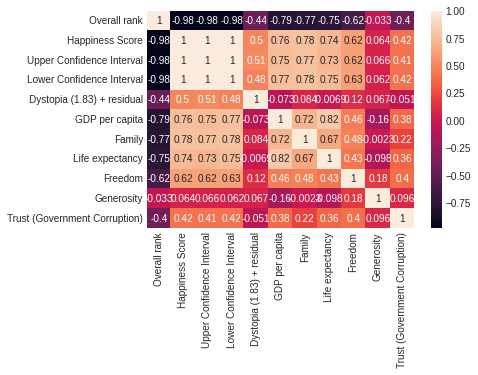

In [ ]:
sns.heatmap(world_happiness_report_2022.corr(),annot=True)

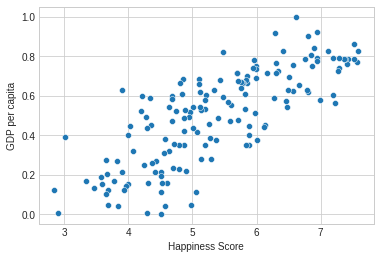

In [ ]:
sns.scatterplot(data=world_happiness_report_2015, x='Happiness Score', y='GDP per capita')

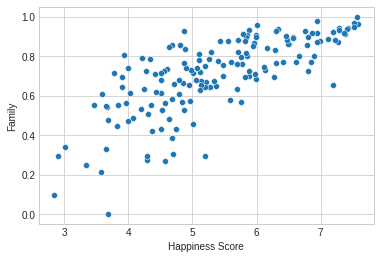

In [ ]:
sns.scatterplot(data=world_happiness_report_2015, x='Happiness Score', y='Family')

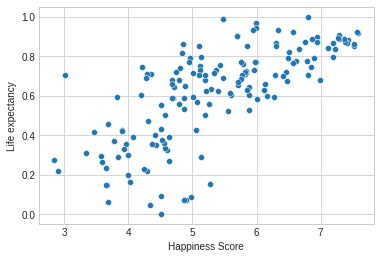

In [ ]:
sns.scatterplot(data=world_happiness_report_2015, x='Happiness Score', y='Life expectancy')

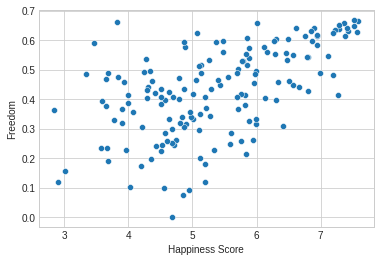

In [ ]:
sns.scatterplot(data=world_happiness_report_2015, x='Happiness Score', y='Freedom')